CCD Lab

Author List
SBID# 113181913
co-authors: SBID# 113164004, SBID# 113827547
affiliations: Department of Physics and Astronomy, Stony Brook University, Stony Brook, NY 11794, USA

In [11]:
#importing all necessary packages for the code
import matplotlib.pyplot as plt
from astropy.nddata import CCDData
from astropy.io import fits
from ccdproc import *
from astropy.visualization import hist
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
from pathlib import Path
import astroalign as aa

4.1.1 Open the 0◦C bias frames in python and plot a histogram1 of the distribution of counts. Make sure to
optimize the plot parameters (e.g. x-range, number of bins, logarithmic axes) in order to be able to
assess the count distribution (if necessary, plot two panels with different settings). Can you identify
any hot pixels? If so, define a cut that rejects them. What fraction of pixels gets rejected?

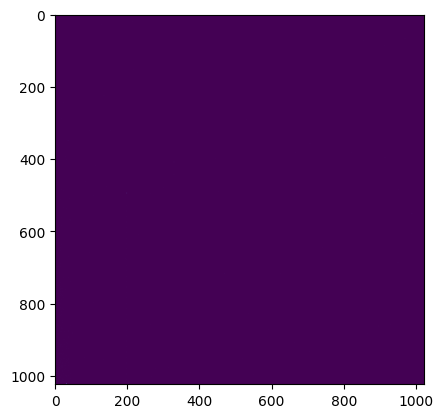

In [12]:
#4.1.1 - Opening the image for bias frame at 0◦C
#Plot image
bias_image = CCDData.read('bias_frame.00000000.BIAS.FIT', unit='adu')
plt.imshow(bias_image.data)

[]

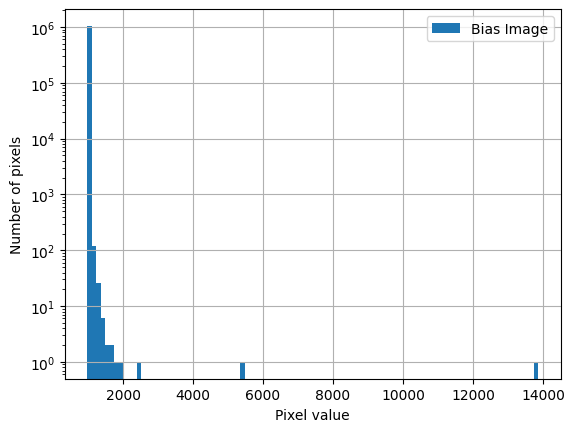

In [13]:
#4.1.1 - Plotting the histogram of the distribution of counts for the bias frame
#Plot Histogram
data = bias_image.data.flatten()
hist(data, bins=100, label='Bias Image')
plt.grid()
plt.legend()
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
plt.semilogy() #y-axis in log-scale

Text(0, 0.5, 'Number of pixels')

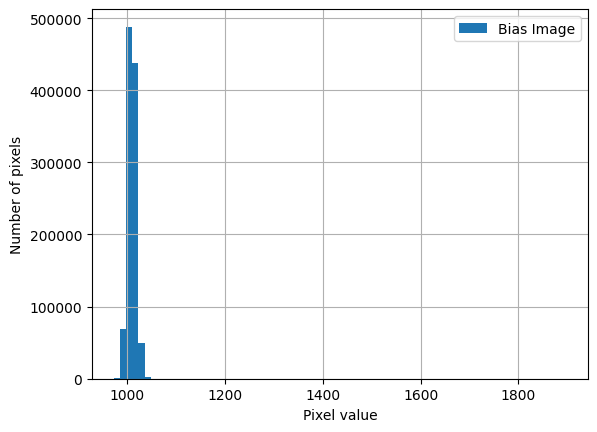

In [14]:
#4.1.1 - Defining a cut that rejects any hot pixels and plotting the cut histogram 
#Plot Cut Histogram 
data_cut = data[data<2000]
hist(data_cut, bins=75, label='Bias Image')
plt.grid()
plt.legend()
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')

In [5]:
#Fraction of Pixels that get rejected
count = 0
for i in range(len(data)):
    if bias_image.data.flatten()[i] > 1060:
        count = count + 1
print(f"The fraction of pixels that got rejected is {count / len(data)}")

KeyboardInterrupt: 

4.1.2
The standard deviation of a bias frame is a measure of the read noise in units of counts. The measured
standard deviation needs to describe the bulk of the count distribution - since the distribution is not
a perfect Gaussian, you will likely need to limit the count values from which you calculate the mean
and the standard deviation. Determine this range, the mean and standard deviation calculated from
this range, and overplot the resulting Gaussian on the count histogram. Look up the gain of the CCD
camera in its header value, and convert your measurement of the read noise into units of electrons. Is
it consistent with the manufacturer’s description?

In [15]:
#4.1.2
#Calculate the standard deviation and mean for Gaussian Curve
std = np.std(data_cut)
print(f'standard deviation is {std}')
mean = np.mean(data_cut)
print(f'mean is {mean}')
uncert = std/(1024)
print(f'uncertainity is: {uncert}')

standard deviation is 8.499324106312372
mean is 1010.1403488359895
uncertainity is: 0.008300121197570676


In [16]:
#Define the Gaussian Function
def g(sigma,u,x):
    return 1/(sigma*(np.sqrt(2*np.pi))) * np.exp(-(x - u)**2 / (2*sigma**2))

Text(0, 0.5, 'Number of pixels')

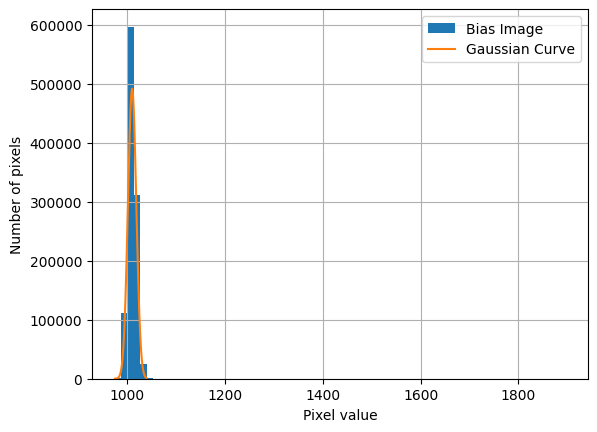

In [17]:
#4.1.2 
#Plot Cut Histogram with Gaussian Fit
x = np.linspace(975,1040,1040)
hist(data_cut, bins=70, label='Bias Image')
plt.plot(x, 10485760*g(std,mean,x), label='Gaussian Curve')
plt.grid()
plt.legend()
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')

$$\text{read noise} = \frac{\sigma \times \text{gain}}{\sqrt{2}}$$

In [18]:
#4.1.2
#Bias method for read noise
bias_data_cut = data_cut
read_noise = np.std(bias_data_cut) * 2.06/ np.sqrt(2)
print(f"Read noise: {read_noise}")

Read noise: 12.380455204816089


4.2.1
Make a median combine of the series of 10 dark frames with the same exposure time. This is a
master dark frame. Identify the “hot” pixels in the master dark frame. Are these pixels “hot” in
all the individual images with this exposure time? Are there pixels that are hot (or warm) in some
individual images, but not others? What could these be?

In [19]:
#4.2.1
#Combining 10 dark images with 30s exposure time and finding the median combine
ccd1 = CCDData.read('dark_frame_30s.06.DARK.FIT', unit='adu')
ccd2 = CCDData.read('dark_frame_30s.07.DARK.FIT', unit='adu')
ccd3 = CCDData.read('dark_frame_30s.08.DARK.FIT', unit='adu')
ccd4 = CCDData.read('dark_frame_30s.09.DARK.FIT', unit='adu')
ccd5 = CCDData.read('dark_frame_30s.10.DARK.FIT', unit='adu')
ccd6 = CCDData.read('dark_frame_30s.11.DARK.FIT', unit='adu')
ccd7 = CCDData.read('dark_frame_30s.12.DARK.FIT', unit='adu')
ccd8 = CCDData.read('dark_frame_30s.13.DARK.FIT', unit='adu')
ccd9 = CCDData.read('dark_frame_30s.14.DARK.FIT', unit='adu')
ccd10 = CCDData.read('dark_frame_30s.15.DARK.FIT', unit='adu')

combiner = Combiner([ccd1, ccd2, ccd3, ccd4, ccd5, ccd6, ccd7, ccd8, ccd9, ccd10])
combined_median = np.array(combiner.median_combine())

In [20]:
#4.2.1
#Making new FIT file from median array
hdu = fits.PrimaryHDU(combined_median)
hdul = fits.HDUList([hdu])
#hdu.writeto('master_dark_frame_30s.DARK.FIT')

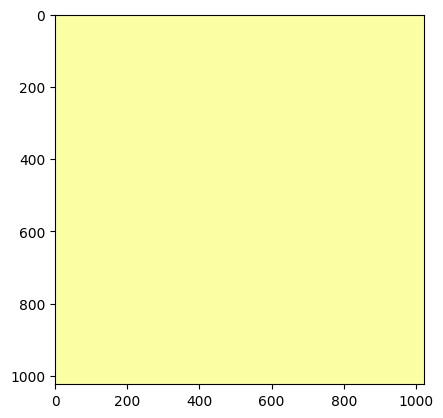

In [21]:
#4.2.1
#Master Dark Frame
dark_image = CCDData.read('master_dark_frame_30s.DARK.FIT', unit='adu')
plt.imshow(dark_image.data, cmap = 'inferno', vmin = 150, vmax = 1000)

[]

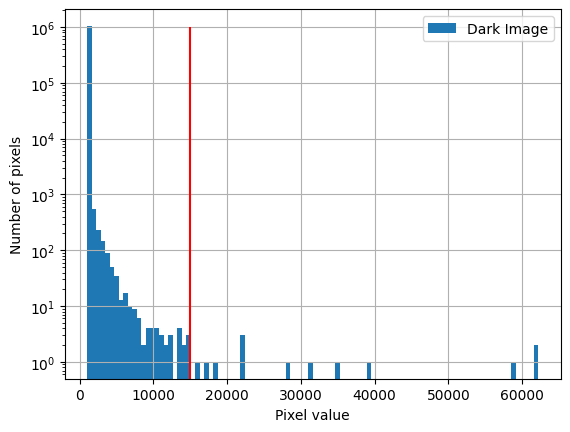

In [22]:
#4.2.1
#Plot Master Dark Image Histogram
dark0 = dark_image.data.flatten()
hist(dark0, bins=100, label='Dark Image')
plt.grid()
plt.vlines(15000,0,1e6, colors='red')
plt.legend()
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
plt.semilogy() #y-axis in log-scale

[]

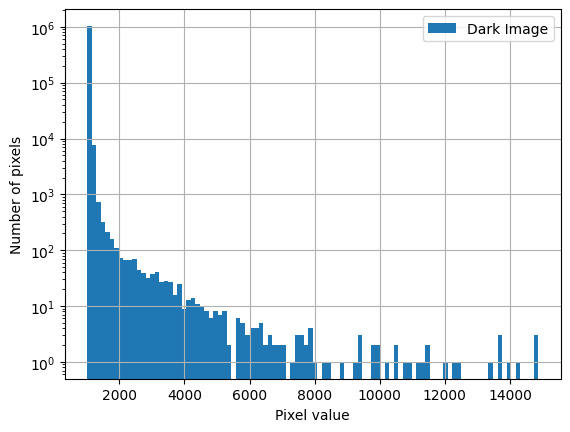

In [23]:
#4.2.1
#Plot Cut Histogram
dark_cut0 = dark0[dark0<15000]
hist(dark_cut0, bins=100, label='Dark Image')
plt.grid()
plt.legend()
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
plt.semilogy() #y-axis in log-scale

4.2.2
For each dark frame in the time series, measure the mean and standard deviation. Make sure to limit
the range of count values so that the measurements are a good description of the bulk of the count
values (similar to what you did for the bias frame).
• For each frame, determine the statistical uncertainty on the mean counts by considering each
pixel an independent measurement of the mean counts.
• Systematic uncertainties are generally more difficult to estimate. Here, you can estimate it by
changing the range of count values from which you compute the mean. Which uncertainty
dominates?
• Plot the mean counts against the exposure time for your dark frames taken at 0
◦C. Make sure to
include error bars that indicate the uncertainty. Perform a linear regression.
• Make a second plot that shows the residuals of the data points (with uncertainties) relative to the
linear regression. Is the best-fit line a good description of the data?
• What is the dark current in electrons per pixel per second? Compare it to the manufacturer’s
specification.
• Estimate the dark current for the other temperature at which you took a bias and dark frame.
Explain why or why not it changes.

In [24]:
#4.2.2 - Opening and reading each dark frames in the time series
ccd11 = CCDData.read('dark_frame_10s.DARK.FIT', unit='adu')
dark_10s = ccd11.data.flatten()
dark_10s_cut = dark_10s[dark_10s < 15000]
dark_30s = ccd10.data.flatten()
dark_30s_cut = dark_30s[dark_30s < 15000]
ccd12 = CCDData.read('dark_frame_60s.DARK.FIT', unit='adu')
dark_60s = ccd12.data.flatten()
dark_60s_cut = dark_60s[dark_60s < 15000]
ccd13 = CCDData.read('dark_frame_90s.DARK.FIT', unit='adu')
dark_90s = ccd13.data.flatten()
dark_90s_cut = dark_90s[dark_90s < 15000]
ccd14 = CCDData.read('dark_frame_120s.DARK.FIT', unit='adu')
dark_120s = ccd14.data.flatten()
dark_120s_cut = dark_120s[dark_120s < 15000]

In [25]:
#Mean, Standard Deviation and Uncertainty for 10s Dark Frame
mean10 = np.mean(dark_10s_cut)
std10 = np.std(dark_10s_cut)
uncert10 = std10/(np.sqrt(1024**2))
print(f'The mean of the data is: {mean10}')
print(f'The standard deviation of the data is: {std10}')
print(f'The uncertainty of the data is: {uncert10}')

The mean of the data is: 1016.6903954231132
The standard deviation of the data is: 43.874405847985756
The uncertainty of the data is: 0.04284609946092359


In [26]:
#Mean, Standard Deviation and Uncertainty for 30s Dark Frame
mean30 = np.mean(dark_30s_cut)
std30 = np.std(dark_30s_cut)
uncert30 = std30/1024

In [27]:
#Mean, Standard Deviation and Uncertainty for 60s Dark Frame
mean60 = np.mean(dark_60s_cut)
std60 = np.std(dark_60s_cut)
uncert60 = std60/(np.sqrt(1024**2))
print(f'The mean of the data is: {mean60}')
print(f'The standard deviation of the data is: {std60}')
print(f'The uncertainty of the data is: {uncert60}')

The mean of the data is: 1062.4348267285184
The standard deviation of the data is: 141.38562569891172
The uncertainty of the data is: 0.13807190009659348


In [28]:
#Mean, Standard Deviation and Uncertainty for 90s Dark Frame
mean90 = np.mean(dark_90s_cut)
std90 = np.std(dark_90s_cut)
uncert90 = std90/(np.sqrt(1024**2))
print(f'The mean of the data is: {mean90}')
print(f'The standard deviation of the data is: {std90}')
print(f'The uncertainty of the data is: {uncert90}')

The mean of the data is: 1089.553274709344
The standard deviation of the data is: 181.85343252655036
The uncertainty of the data is: 0.17759124270170934


In [29]:
#Mean, Standard Deviation and Uncertainty for 120s Dark Frame
mean120 = np.mean(dark_120s_cut)
std120 = np.std(dark_120s_cut)
uncert120 = std120/(np.sqrt(1024**2))
print(f'The mean of the data is: {mean120}')
print(f'The standard deviation of the data is: {std120}')
print(f'The uncertainty of the data is: {uncert120}')

The mean of the data is: 1115.7015448681325
The standard deviation of the data is: 213.62654431281496
The uncertainty of the data is: 0.20861967218048336


In [30]:
#4.2.2 
#create an array of each dark frame
mean_counts = np.array([mean, mean10, mean30, mean60, mean90, mean120])
print(mean_counts)

#create an array of each exposure time
exp_time = np.array([0, 10, 30, 60, 90, 120]) 
print(exp_time)

[1010.14034884 1016.69039542 1035.52157145 1062.43482673 1089.55327471
 1115.70154487]
[  0  10  30  60  90 120]


1008.9943566861658 0.8905671674047515


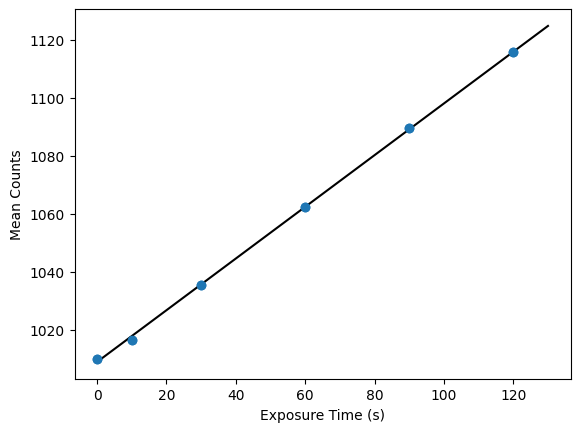

In [31]:
#4.2.2 
#make a scatter plot of the mean counts versus the exposure time
plt.scatter(exp_time, mean_counts)
b, a = np.polyfit(exp_time, mean_counts, deg=1)
xseq = np.linspace(0, 130, 6)
plt.plot(xseq, a + b * xseq, color="k", lw=1.5)

#create an array of the uncertainty values
yerr = np.array([uncert, uncert10, uncert60, uncert60, uncert90, uncert120])

#add error bars into the plot
plt.errorbar(exp_time, mean_counts, yerr = yerr, fmt='o')
plt.xlabel('Exposure Time (s)')
plt.ylabel('Mean Counts')
print(a,b)

Text(0, 0.5, 'Residual')

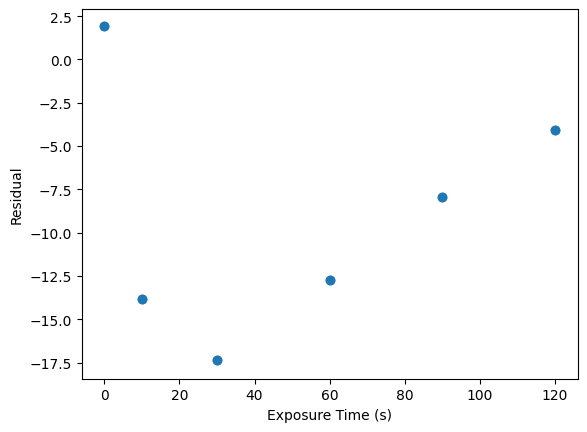

In [32]:
#4.2.2 - Making a second plot of the residuals of the data points, with uncertainties, relative to the linear regression in the previous plot
def residual(a,b, xseq):
    return mean_counts - (a + b * xseq)

plt.scatter(exp_time, residual(1008.2142894895652,0.8582815152075286, xseq))
yerr = np.array([uncert, uncert10, uncert60, uncert60, uncert90, uncert120])
plt.errorbar(exp_time, residual(1008.2142894895652,0.8582815152075286, xseq), yerr = yerr, fmt='o')
plt.xlabel('Exposure Time (s)')
plt.ylabel('Residual')

This plot demonstrates that the line of best fit is a good description of the data since it shows that the data is randomly scattered above and below the line of best fit.

In [33]:
#Dark Current in electrons per pixel per second, 2.06 is given
dark_current = 2.06 * b
print(dark_current)

1.834568364853788


In [34]:
#4.2.2 - Dark image at another temperature; read in the image file for the dark frame taken at 10 degrees Celsius 
# exposure time 120s
ten_celsius = CCDData.read('dark_frame_tenC.20.DARK.FIT', unit='adu')
celsius = ten_celsius.data.flatten()

In [35]:
# mean, std, and uncertainty of the 10 celsius dark frame
meanCel = np.mean(dark_120s_cut)
stdCel = np.std(dark_120s_cut)
uncertCel = stdCel/(np.sqrt(1024**2))
print(f'The mean of the data is: {meanCel}')
print(f'The standard deviation of the data is: {stdCel}')
print(f'The uncertainty of the data is: {uncertCel}')

The mean of the data is: 1115.7015448681325
The standard deviation of the data is: 213.62654431281496
The uncertainty of the data is: 0.20861967218048336


In [36]:
#create an array of each dark frame including the 10 celsius dark frame
mean_counts2 = np.array([mean, mean10, mean30, mean60, mean90, mean120, meanCel])
print(mean_counts2)

#create an array of each exposure time
exp_time2 = np.array([0, 10, 30, 60, 90, 120, 120]) 
print(exp_time2)

[1010.14034884 1016.69039542 1035.52157145 1062.43482673 1089.55327471
 1115.70154487 1115.70154487]
[  0  10  30  60  90 120 120]


1009.009743109052 0.8899425700400968


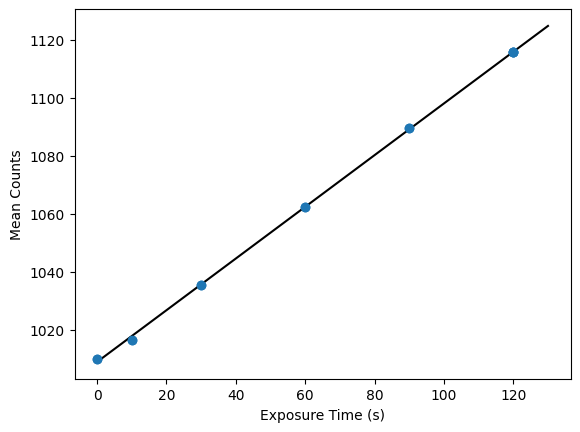

In [37]:
#4.2.2 
#make a scatter plot of the mean counts versus the exposure time including the 10 celsius dark frame
plt.scatter(exp_time2, mean_counts2)
b, a = np.polyfit(exp_time2, mean_counts2, deg=1)
xseq = np.linspace(0, 130, 7)
plt.plot(xseq, a + b * xseq, color="k", lw=1.5)

#create an array of the uncertainty values
yerr2 = np.array([uncert, uncert10, uncert60, uncert60, uncert90, uncert120, uncertCel])

#add error bars into the plot
plt.errorbar(exp_time2, mean_counts2, yerr = yerr2, fmt='o')
plt.xlabel('Exposure Time (s)')
plt.ylabel('Mean Counts')
print(a,b)

In [38]:
#dark current of the 10 celsius dark frame
dark_current2 = 2.06 * b
print(dark_current2)

1.8332816942825996


4.3.1
Take the median of your 10 flat-fields to reduce noise from photon-counting. Normalize it to its
typical count level. This is your master flat-field.

In [39]:
#4.3.1
#Reading in the Flat-field Images, combining to take the median of the ten flat fields and normalizing it for the master flat-field
flat1 = CCDData.read('flat_fields_frame.00000005.FIT', unit='adu')
flat2 = CCDData.read('flat_fields_frame.00000006.FIT', unit='adu')
flat3 = CCDData.read('flat_fields_frame.00000007.FIT', unit='adu')
flat4 = CCDData.read('flat_fields_frame.00000008.FIT', unit='adu')
flat5 = CCDData.read('flat_fields_frame.00000009.FIT', unit='adu')
flat6 = CCDData.read('flat_fields_frame.00000010.FIT', unit='adu')
flat7 = CCDData.read('flat_fields_frame.00000011.FIT', unit='adu')
flat8 = CCDData.read('flat_fields_frame.00000012.FIT', unit='adu')
flat9 = CCDData.read('flat_fields_frame.00000013.FIT', unit='adu')
flat10 = CCDData.read('flat_fields_frame.00000014.FIT', unit='adu')

combiner_flats = Combiner([flat1, flat2, flat3, flat4, flat5, flat6, flat7, flat8, flat9, flat10])
combined_median_flats = np.array(combiner_flats.median_combine())
mean_flats = np.mean(combined_median_flats)
normed = combined_median_flats/mean_flats

In [40]:
#4.3.1 - Making new FIT file from median array
hdu_flats = fits.PrimaryHDU(normed)
hdul_flats = fits.HDUList([hdu_flats])
#hdu_flats.writeto('normed_master_flat.FIT')

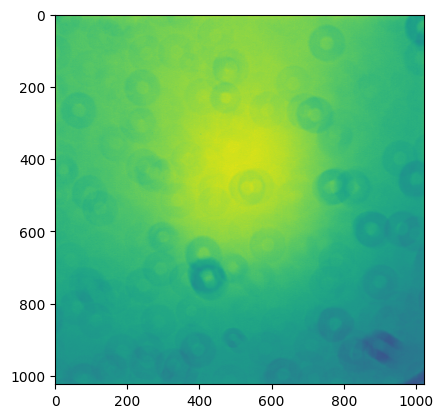

In [41]:
#4.3.1 
#Master flat-field
flat_image = CCDData.read('normed_master_flat.FIT', unit='adu')
plt.imshow(flat_image.data)

4.3.2
Open the master flat-field in ds9. Note how some parts of the image receive less light than others.
Identify regions of particularly low counts rates and quantify what fraction of light (compared to the
brightest part of the flat-field) they receive. (To help quantify this number, you can use the “Pixel
Table” in ds9 found under the “Analysis“ tab, and/or a “Projection“ region. To place a region, you
first have to select “Region“ under the “Edit“ menu.)

4.3.2 - Regions of particularly low counts rates and quantify what fraction of light they receive

4.3.3 - If placed the same star first into the center of the image, and then close to one the corners, how would its “observed” magnitude change

4.3.4 
Plot a histogram of the counts in your master flat-field. Can you identify any dead pixels?

Text(0, 0.5, 'Number of pixels')

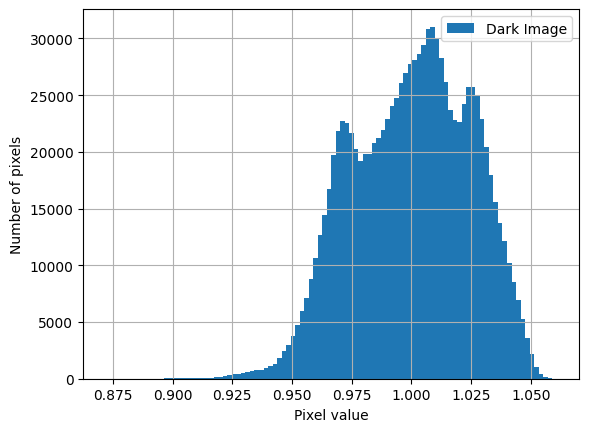

In [42]:
#4.3.4 - Plotting a histogram of the flat-field
hist(flat_image.data.flatten(), bins=100, label='Dark Image')
plt.grid()
plt.legend()
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')

4.3.5 - If flat-fields were forgotten to take on the night of the observations, they cannot be retaken later since all the previous calibrations were for a specific setup and environment.

4.4.1
The spectrograph has 3 slits, with widths 25, 35 and 50 µm. Open the spectroscopic flat-field in ds9.
You should see 3 spectra - which of them corresponds to the 50µm slit? - the 50 slit is the last one, the 25 slit is the middle one, the 35 slit is the top one, we used the 25 slit

4.4.2
In the following, you will work with the spectrum taken with the 50µm slit. Cut out the images to
keep only the data from your target slit. “Collapse” the flat-field from 2d to 1d by taking the median
value of each column. Make a plot of the 1d flat-field values against the pixel positions along the
dispersion axis.

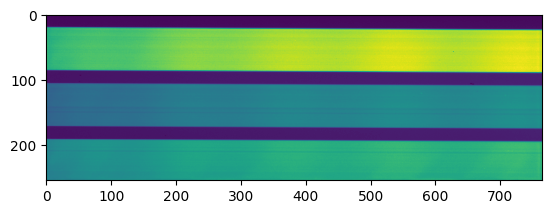

In [43]:
# 4.4.2 - reading in the flat field of the spectrum and showing the image
flat_spectro = CCDData.read('flat_fields.00000007.FIT', unit='adu')
plt.imshow(flat_spectro.data)

In [44]:
#4.4.2 - Cutting out the images to keep only the data from the target slit of 50µm
flat_spectro = flat_spectro.data[106:176, :]
np.shape(flat_spectro)

(70, 765)

In [45]:
#4.4.2 - Making new FIT file from median array
hdu_flats2 = fits.PrimaryHDU(flat_spectro)
hdul_flats2 = fits.HDUList([hdu_flats2])
#hdu_flats2.writeto('cut_spec.FIT')

53550

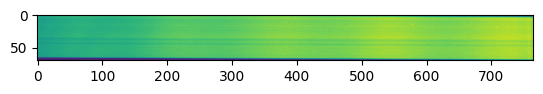

In [46]:
#4.4.2 - Displaying the cut spectrum image
spec_image = CCDData.read('cut_spec.FIT', unit='adu')
plt.imshow(spec_image.data)

#size of the flattened array
np.size(spec_image.data.flatten())

765
765


Text(0, 0.5, 'Intensity')

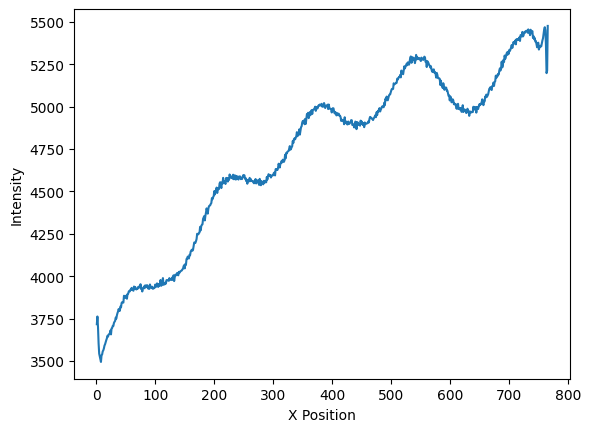

In [47]:
#4.4.2 - plot of the 1D flat field values against the pixel positions along the dispersion axis 
intensity = np.median(spec_image.data, axis = 0)
print(np.size(intensity))
x_pos = np.linspace(1,765,765)
print(np.size(x_pos))
plt.plot(x_pos, intensity)
plt.xlabel('X Position')
plt.ylabel('Intensity')

4.4.3
Recall that the variation in flat-field counts with wavelength can be due to either a change in sensitivity, or the intrinsic spectrum of the lamps used to take the flat-field. Since we cannot tell the difference
at this point, we will first “normalize” the flat-field along the dispersion axis to vary around 1. Variations between neighboring pixels thus reflect true differences in sensitivity, but we do not draw
conclusions about variations between pixels on large pixels (which may be dominated by the lamp
spectrum). To normalize the flat-field, first fit a low-order polynomial to the observed 1d flat-field
spectrum2
. Divide the 2d flat-field by the fit - this is your normalized flat-field. Open it in ds9 and
discuss how it changed compared to the original.


Text(0, 0.5, 'Intensity')

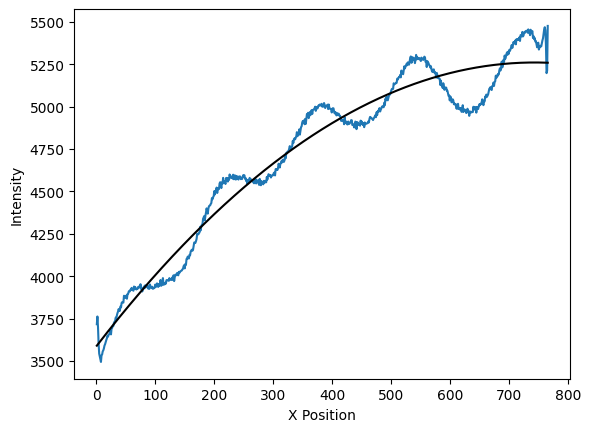

In [48]:
#4.4.3 - a low order polynomial fit of the flat field data in order to normalize
a, b, c = np.polyfit(x_pos, intensity, deg=2)
xseq = np.linspace(1, 765, 765)
plt.plot(x_pos, intensity)
plt.plot(x_pos, a * xseq **2 + b*xseq + c, color="k", lw=1.5)
plt.xlabel('X Position')
plt.ylabel('Intensity')

4.4.4
Cut out the arc lamp spectrum of the 50µm slit (make sure that the cut-out is exactly the same as for
the flat-field). Apply the normalized flat field to the arc lamp spectrum.

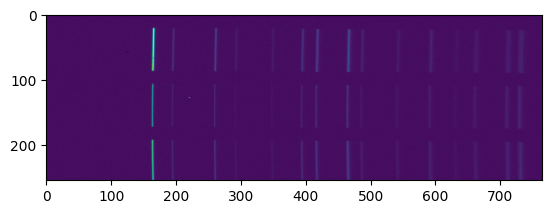

In [49]:
#4.4.4 - reading in the arc lamp flat field
flat_arclamp = CCDData.read('arc_lamp_spectrum.00000002.FIT', unit='adu')
plt.imshow(flat_arclamp.data)

In [50]:
#4.4.4 cutting the image 
flat_arclamp = flat_arclamp.data[106:176, :]
np.shape(flat_arclamp)

(70, 765)

In [51]:
#creating a new file for the cut image
hdu_flats2 = fits.PrimaryHDU(flat_arclamp)
hdul_flats2 = fits.HDUList([hdu_flats2])
#hdu_flats2.writeto('cut_arclamp.FIT')

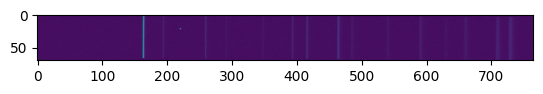

In [52]:
#reading in the cut image
arclamp_image = CCDData.read('cut_arclamp.FIT', unit='adu')
plt.imshow(arclamp_image.data)

In [53]:
#normalizing the cut data
print(np.size(arclamp_image.data))
normed_spec = arclamp_image.data/(a * xseq **2 + b*xseq + c)

53550


In [54]:
#creating a new file for the cut and normalized data
hdu_flats3= fits.PrimaryHDU(normed_spec)
hdul_flats3 = fits.HDUList([hdu_flats3])
#hdu_flats3.writeto('cut_arclamp_normed.FIT')

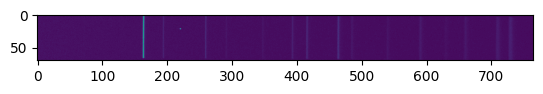

In [55]:
#reading in the normalized image of the arc lamp spectrum
cut_arclamp_normed = CCDData.read('cut_arclamp_normed.FIT', unit='adu')
plt.imshow(cut_arclamp_normed.data)

4.4.5
Derive the wavelength calibration from the arc lamp spectrum. To do so, identify the emission lines
that you see and make a table consisting of the pixel positions and wavelengths of the lines. Plot
wavelength vs. pixel position and find the best-fit line (or polynomial) to compute wavelength from
pixel position - this is the wavelength calibration

In [56]:
#4.4.5 
# creating an array of the pixel values for each emission line in the normed arc lamp spectrum 
pixel_value_spec = np.array([164.829, 195.5, 260.894, 292.722, 348.856, 417.144, 465.755, 486, 588, 541.565, 
                             593.648, 630.685, 662.514, 711.125, 732.537])

# creating an array of an example wavelength for neon's emission lines (wavelength in nm)
ex_wavelength = np.array([540.1, 585.2, 588.2, 603.0, 607.4, 616.4, 621.7, 626.6, 633.4, 638.3, 640.2, 650.6, 
                          659.9, 692.9, 703.2])

527.3100020855768 0.21115308647968006


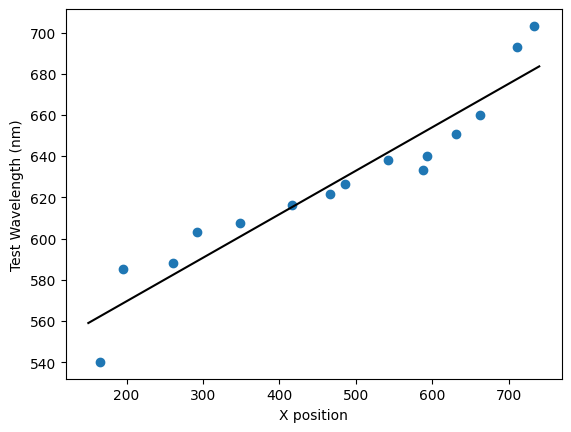

In [57]:
#4.4.5 - plotting the wavelength vs pixel position with a best fit line
plt.scatter(pixel_value_spec, ex_wavelength)
b, a = np.polyfit(pixel_value_spec, ex_wavelength, deg=1)
xseq = np.linspace(150, 740, 15)
plt.plot(xseq, a + b * xseq, color="k", lw=1.5)
plt.xlabel('X position')
plt.ylabel('Test Wavelength (nm)')
print(a,b)

Text(0, 0.5, 'Test Wavelength (nm)')

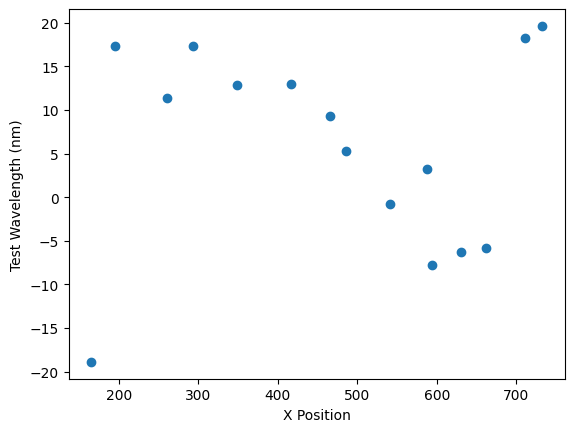

In [58]:
#4.4.5 plotting the residuals of the above plot
def residual(a,b, xseq):
    return ex_wavelength - (a + b * xseq)

plt.scatter(pixel_value_spec, residual(527.3100020855768, 0.21115308647968006, xseq))
plt.xlabel('X Position')
plt.ylabel('Test Wavelength (nm)')

4.4.6
Plot the calibrated spectrum, labelling a few of the Neon emission lines.

[558.98296506 567.88155942 576.78015378 585.67874813 594.57734249
 603.47593685 612.37453121 621.27312557 630.17171993 639.07031429
 647.96890865 656.867503   665.76609736 674.66469172 683.56328608]


Text(0, 0.5, 'Intensity')

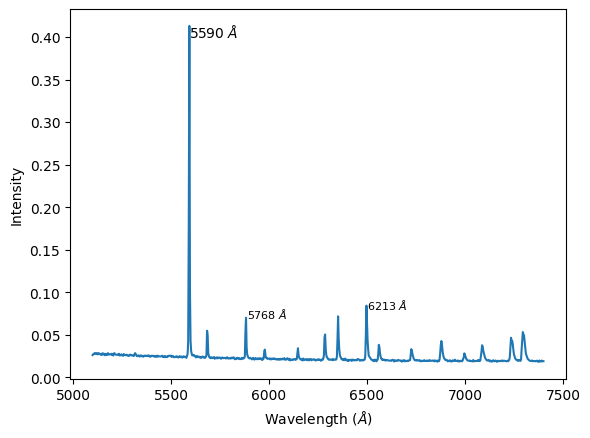

In [59]:
#4.4.6 - plot of the calibrated spectrum with labels on the emission lines
wave = np.array(a + b * xseq)
print(wave)
new2 = np.median(cut_arclamp_normed.data, axis = 0)
xseq2 = np.linspace(510, 740, 765)*10
wavelength = np.array(a + b * xseq2)
plt.plot(xseq2, new2)
plt.text(5590, 0.40, r'5590 $\AA$', fontsize = 10)
plt.text(5890, 0.07, r'5768 $\AA$', fontsize = 8)
plt.text(6500, 0.08, r'6213 $\AA$', fontsize = 8)
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Intensity')

In [60]:
print(wavelength[-1])

2089.8428420352093


4.4.7 - What is the length of the spectrum (in A) that is covered by the spectrograph? What is the dispersion ˚
of the spectrograph?the dispersion is 0-765, the length of the spectrum is 6835.6 angs

4.4.5
Discuss how to apply the various calibration files. Which calibration exposures have to be taken with the
same telescope + instrument set-up as the observations; which ones could you take on the next day, if
necessary?
To calibrate the images what we would do is subtract the master dark image for the 10s exposure from the saturn filter that had 10 second exposure, then we would divide that by the master normed flat field. For the red and visible which were both 100s exposure we would subtract the master dark for the 100s exposure and then divide by master flat field. We could take the bias and darks a different day, but not the flat fields.

4.6
Take the image of the astronomical object of your chosing and reduce the image through the calibration
steps. Make a ’pretty’ image that is as good as possible excempt from artifacts. Do the calibration for all
three photometric bands and produce an rgb image. Discuss imperfections in the reductions and lessons you
learned to improve (if necessary) the calibration data or reduction procedure for the next labs.

In [61]:
#4.6 reading in the Blue Flat fields
blue_flat1 = CCDData.read('flat_fields_frame_blue.00000015.FIT', unit='adu')
blue_flat2 = CCDData.read('flat_fields_frame_blue.00000016.FIT', unit='adu')
blue_flat3 = CCDData.read('flat_fields_frame_blue.00000017.FIT', unit='adu')
blue_flat4 = CCDData.read('flat_fields_frame_blue.00000018.FIT', unit='adu')
blue_flat5 = CCDData.read('flat_fields_frame_blue.00000019.FIT', unit='adu')
blue_flat6 = CCDData.read('flat_fields_frame_blue.00000020.FIT', unit='adu')
blue_flat7 = CCDData.read('flat_fields_frame_blue.00000021.FIT', unit='adu')
blue_flat8 = CCDData.read('flat_fields_frame_blue.00000022.FIT', unit='adu')
blue_flat9 = CCDData.read('flat_fields_frame_blue.00000023.FIT', unit='adu')
blue_flat10 = CCDData.read('flat_fields_frame_blue.00000024.FIT', unit='adu')
blue_flat11 = CCDData.read('flat_fields_frame_blue.00000025.FIT', unit='adu')
blue_flat12 = CCDData.read('flat_fields_frame_blue.00000026.FIT', unit='adu')

# taking the median combine of the blue flats and norming
combiner_blue_flats = Combiner([blue_flat1, blue_flat2, blue_flat3, blue_flat4, blue_flat5, blue_flat6, blue_flat7, blue_flat8, blue_flat9, blue_flat10, blue_flat11, blue_flat12])
combined_blue_median_flats = np.array(combiner_blue_flats.median_combine())
mean_blue_flats = np.mean(combined_blue_median_flats)
normed_blue = combined_blue_median_flats/mean_blue_flats

#4.6 - Making new FIT file from median array
hdu4 = fits.PrimaryHDU(normed_blue)
hdul4 = fits.HDUList([hdu4])
#hdu4.writeto('master_blue_flat.FIT')

final_blue_flat = CCDData.read('master_blue_flat.FIT', unit='adu')
#plt.imshow(final_blue_flat.data)

In [96]:
#4.6 reading in the red Flat fields
red_flat1 = CCDData.read('flat_fields_frame_red.00000027.FIT', unit='adu')
red_flat2 = CCDData.read('flat_fields_frame_red.00000028.FIT', unit='adu')
red_flat3 = CCDData.read('flat_fields_frame_red.00000029.FIT', unit='adu')
red_flat4 = CCDData.read('flat_fields_frame_red.00000030.FIT', unit='adu')
red_flat5 = CCDData.read('flat_fields_frame_red.00000031.FIT', unit='adu')
red_flat6 = CCDData.read('flat_fields_frame_red.00000032.FIT', unit='adu')
red_flat7 = CCDData.read('flat_fields_frame_red.00000033.FIT', unit='adu')
red_flat8 = CCDData.read('flat_fields_frame_red.00000034.FIT', unit='adu')
red_flat9 = CCDData.read('flat_fields_frame_red.00000035.FIT', unit='adu')
red_flat10 = CCDData.read('flat_fields_frame_red.00000036.FIT', unit='adu')
red_flat11 = CCDData.read('flat_fields_frame_red.00000037.FIT', unit='adu')
red_flat12 = CCDData.read('flat_fields_frame_red.00000038.FIT', unit='adu')
red_flat13 = CCDData.read('flat_fields_frame_red.00000039.FIT', unit='adu')

# taking the median combine of the red flats and norming
combiner_flats_red = Combiner([red_flat1, red_flat2, red_flat3, red_flat4, red_flat5, red_flat6, red_flat7, red_flat8, red_flat9, 
                               red_flat10, red_flat11, red_flat12, red_flat13])
combined_median_flats_red = np.array(combiner_flats_red.median_combine())
mean_flats_red = np.mean(combined_median_flats_red)
normed_red = combined_median_flats_red/mean_flats_red

hdu = fits.PrimaryHDU(normed_red)
hdul = fits.HDUList([hdu])
#hdu.writeto('flat_red.FIT')

final_red_flat = CCDData.read('flat_red.FIT', unit='adu')
#show_image(red_image_flat.data, cmap='inferno')

In [63]:
#Combining 10 dark images with 30s exposure time and finding median
saturn_bdark1 = CCDData.read('saturn_blue_darks.00000040.DARK.FIT', unit='adu')
saturn_bdark2 = CCDData.read('saturn_blue_darks.00000041.DARK.FIT', unit='adu')
saturn_bdark3 = CCDData.read('saturn_blue_darks.00000042.DARK.FIT', unit='adu')
saturn_bdark4 = CCDData.read('saturn_blue_darks.00000043.DARK.FIT', unit='adu')
saturn_bdark5 = CCDData.read('saturn_blue_darks.00000044.DARK.FIT', unit='adu')
saturn_bdark6 = CCDData.read('saturn_blue_darks.00000045.DARK.FIT', unit='adu')
saturn_bdark7 = CCDData.read('saturn_blue_darks.00000046.DARK.FIT', unit='adu')
saturn_bdark8 = CCDData.read('saturn_blue_darks.00000047.DARK.FIT', unit='adu')
saturn_bdark9 = CCDData.read('saturn_blue_darks.00000048.DARK.FIT', unit='adu')
saturn_bdark10 = CCDData.read('saturn_blue_darks.00000049.DARK.FIT', unit='adu')

combiner2 = Combiner([saturn_bdark1, saturn_bdark2, saturn_bdark3, saturn_bdark4, saturn_bdark5, saturn_bdark6, saturn_bdark7,
                     saturn_bdark8, saturn_bdark9, saturn_bdark10])
combined_median2 = np.array(combiner2.median_combine())

In [64]:
#Making new FIT file from median array
hdu = fits.PrimaryHDU(combined_median2)
hdul = fits.HDUList([hdu])
#hdu.writeto('saturn_master_bdark1.DARK.FIT')

In [65]:
#Master Blue Dark Frame for Saturn
dark_blue = CCDData.read('saturn_master_bdark1.DARK.FIT', unit='adu')
#plt.imshow(dark_blue.data)

In [66]:
#Combining 10 dark images for Saturn with a visible filter and finding median combine
saturn_vdark1 = CCDData.read('saturn_visible_darks.00000010.DARK.FIT', unit='adu')
saturn_vdark2 = CCDData.read('saturn_visible_darks.00000011.DARK.FIT', unit='adu')
saturn_vdark3 = CCDData.read('saturn_visible_darks.00000012.DARK.FIT', unit='adu')
saturn_vdark4 = CCDData.read('saturn_visible_darks.00000013.DARK.FIT', unit='adu')
saturn_vdark5 = CCDData.read('saturn_visible_darks.00000014.DARK.FIT', unit='adu')
saturn_vdark6 = CCDData.read('saturn_visible_darks.00000015.DARK.FIT', unit='adu')
saturn_vdark7 = CCDData.read('saturn_visible_darks.00000016.DARK.FIT', unit='adu')
saturn_vdark8 = CCDData.read('saturn_visible_darks.00000017.DARK.FIT', unit='adu')
saturn_vdark9 = CCDData.read('saturn_visible_darks.00000018.DARK.FIT', unit='adu')
saturn_vdark10 = CCDData.read('saturn_visible_darks.00000019.DARK.FIT', unit='adu')

combiner3 = Combiner([saturn_vdark1, saturn_vdark2, saturn_vdark3, saturn_vdark4, saturn_vdark5, saturn_vdark6, saturn_vdark7,
                     saturn_vdark8, saturn_vdark9, saturn_vdark10])
combined_median3 = np.array(combiner3.median_combine())

In [67]:
#Making new FIT file from median array
hdu = fits.PrimaryHDU(combined_median3)
hdul = fits.HDUList([hdu])
#hdu.writeto('saturn_master_vdark1.DARK.FIT')

In [68]:
#Master Saturn Visible Dark Frame
dark_visible = CCDData.read('saturn_master_vdark1.DARK.FIT', unit='adu')
#plt.imshow(dark_visible.data)

In [69]:
#Combining 10 dark images for Saturn with a blue filter and finding median combine
saturn_blue1 = CCDData.read('saturn_blue.00000030.FIT', unit='adu')
saturn_blue2 = CCDData.read('saturn_blue.00000031.FIT', unit='adu')
saturn_blue3 = CCDData.read('saturn_blue.00000032.FIT', unit='adu')
saturn_blue4 = CCDData.read('saturn_blue.00000033.FIT', unit='adu')
saturn_blue5 = CCDData.read('saturn_blue.00000034.FIT', unit='adu')
saturn_blue6 = CCDData.read('saturn_blue.00000035.FIT', unit='adu')
saturn_blue7 = CCDData.read('saturn_blue.00000036.FIT', unit='adu')
saturn_blue8 = CCDData.read('saturn_blue.00000037.FIT', unit='adu')
saturn_blue9 = CCDData.read('saturn_blue.00000038.FIT', unit='adu')
saturn_blue10 = CCDData.read('saturn_blue.00000039.FIT', unit='adu')

combiner4 = Combiner([saturn_blue1, saturn_blue2, saturn_blue3, saturn_blue4, saturn_blue5, saturn_blue6, saturn_blue7,
                     saturn_blue8, saturn_blue9, saturn_blue10])
combined_median4 = np.array(combiner4.median_combine())

In [70]:
#Making new FIT file from median array
hdu = fits.PrimaryHDU(combined_median4)
hdul = fits.HDUList([hdu])
#hdu.writeto('master_saturn_blue1.FIT')

In [71]:
#Master Saturn Blue Dark Frame
saturn_blue = CCDData.read('master_saturn_blue1.FIT', unit='adu')
#plt.imshow(saturn_blue.data)

In [72]:
#Combining images for Saturn with a Visible filter and finding median combine
saturn_visible1 = CCDData.read('saturn_visible.00000000.FIT', unit='adu')
saturn_visible2 = CCDData.read('saturn_visible.00000001.FIT', unit='adu')
saturn_visible3 = CCDData.read('saturn_visible.00000002.FIT', unit='adu')
saturn_visible4 = CCDData.read('saturn_visible.00000003.FIT', unit='adu')
saturn_visible5 = CCDData.read('saturn_visible.00000004.FIT', unit='adu')
saturn_visible6 = CCDData.read('saturn_visible.00000005.FIT', unit='adu')
saturn_visible7 = CCDData.read('saturn_visible.00000006.FIT', unit='adu')
saturn_visible8 = CCDData.read('saturn_visible.00000007.FIT', unit='adu')
saturn_visible9 = CCDData.read('saturn_visible.00000008.FIT', unit='adu')
saturn_visible10 = CCDData.read('saturn_visible.00000009.FIT', unit='adu')

combiner5 = Combiner([saturn_visible1, saturn_visible2, saturn_visible3, saturn_visible4, saturn_visible5, saturn_visible6, saturn_visible7,
                     saturn_visible8, saturn_visible9, saturn_visible10])
combined_median5 = np.array(combiner5.median_combine())

In [73]:
#Making new FIT file from median array
hdu = fits.PrimaryHDU(combined_median5)
hdul = fits.HDUList([hdu])
#hdu.writeto('master_saturn_visible.FIT')

In [74]:
#Master Saturn Visible Frame
saturn_visible = CCDData.read('master_saturn_visible.FIT', unit='adu')
#plt.imshow(saturn_visible.data)

In [75]:
#4.6 Combining images for Saturn with a red filter and finding median combine
saturn_red1 = CCDData.read('saturn_red.00000020.FIT', unit='adu')
saturn_red2 = CCDData.read('saturn_red.00000021.FIT', unit='adu')
saturn_red3 = CCDData.read('saturn_red.00000022.FIT', unit='adu')
saturn_red4 = CCDData.read('saturn_red.00000023.FIT', unit='adu')
saturn_red5 = CCDData.read('saturn_red.00000024.FIT', unit='adu')
saturn_red6 = CCDData.read('saturn_red.00000025.FIT', unit='adu')
saturn_red7 = CCDData.read('saturn_red.00000026.FIT', unit='adu')
saturn_red8 = CCDData.read('saturn_red.00000027.FIT', unit='adu')
saturn_red9 = CCDData.read('saturn_red.00000028.FIT', unit='adu')
saturn_red10 = CCDData.read('saturn_red.00000029.FIT', unit='adu')

combiner6 = Combiner([saturn_red1, saturn_red2, saturn_red3, saturn_red4, saturn_red5, saturn_red6, saturn_red7, 
                      saturn_red8, saturn_red9, saturn_red10])
combined_median6 = np.array(combiner6.median_combine())

In [76]:
#Making new FIT file from median array
hdu = fits.PrimaryHDU(combined_median6)
hdul = fits.HDUList([hdu])
#hdu.writeto('master_saturn_red.FIT')

In [77]:
#Master Saturn red Frame
saturn_red = CCDData.read('master_saturn_red.FIT', unit='adu')
#plt.imshow(saturn_red.data)

In [78]:
# shifting the array data for each image in order to align
visible_array = np.roll(saturn_visible.data, (25, 23), axis = (1,0))
blue_array = np.roll(saturn_blue.data, (-30, -28), axis = (1,0))

In [79]:
# stacking the images
stacked3 = np.array([saturn_red.data/saturn_red.data.max(), visible_array/visible_array.max(), blue_array/blue_array.max()])
np.shape(stacked3)
stacked = np.zeros((1024,1024,3))
stacked[:,:,0] = stacked3[0]
stacked[:,:,1] = stacked3[1]
stacked[:,:,2] = stacked3[2]

In [80]:
hdu = fits.PrimaryHDU(stacked3[0])
image_hdu = fits.ImageHDU([stacked3[1]])
image_hdu2 = fits.ImageHDU([stacked3[2]])
hdul = fits.HDUList([hdu, image_hdu, image_hdu2])
#hdul.writeto('master_stacked_saturn_test1.FIT')

(400.0, 460.0)

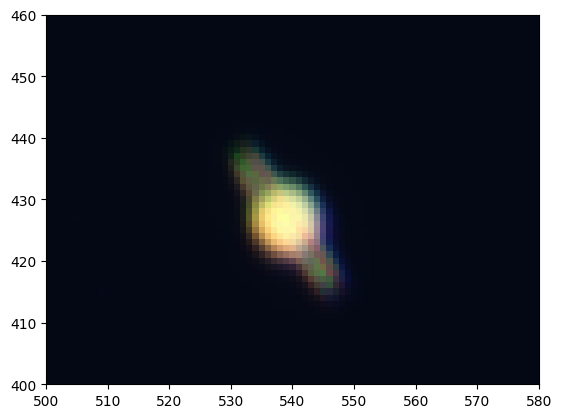

In [81]:
# show and adjust the image
plt.imshow(stacked)
plt.xlim(500,580)
plt.ylim(400,460)

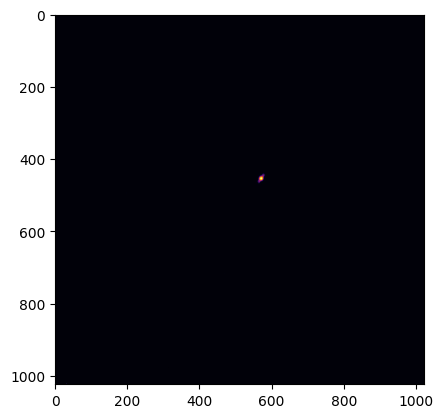

In [93]:
blue_sub = saturn_blue.data - dark_visible.data
#plt.imshow(blue_sub.data, cmap='inferno')
final_blue = blue_sub.data / final_blue_flat.data
plt.imshow(final_blue, cmap='inferno')

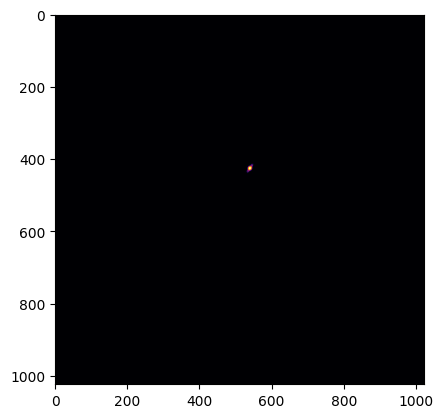

In [94]:
red_sub = saturn_red.data - dark_visible.data
#plt.imshow(red_sub.data, cmap='inferno')
final_red = red_sub.data / red_image_flat.data
plt.imshow(final_red, cmap='inferno')

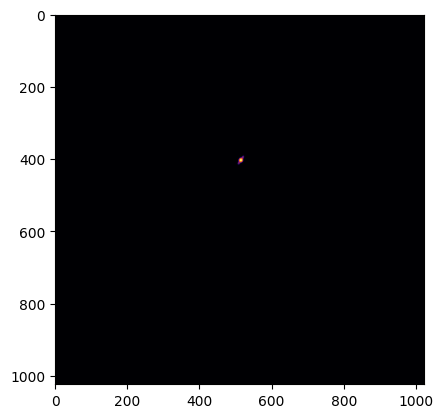

In [95]:
visible_sub = saturn_visible.data - dark_visible.data
#plt.imshow(visible_sub.data, cmap='inferno')
final_visible = visible_sub.data / flat_image.data
plt.imshow(final_visible.data, cmap='inferno')

In [118]:
visible_array_t = np.roll(final_visible.data, (25, 23), axis = (1,0))
blue_array_t = np.roll(final_blue.data, (-30, -28), axis = (1,0))

In [119]:
# stacking the images
stacked_test = np.array([final_red.data/final_red.max(), visible_array_t/visible_array_t.max(), blue_array_t/blue_array_t.max()])
np.shape(stacked_test)
stacked_t = np.zeros((1024,1024,3))
stacked_t[:,:,0] = stacked_test[0]
stacked_t[:,:,1] = stacked_test[1]
stacked_t[:,:,2] = stacked_test[2]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(400.0, 460.0)

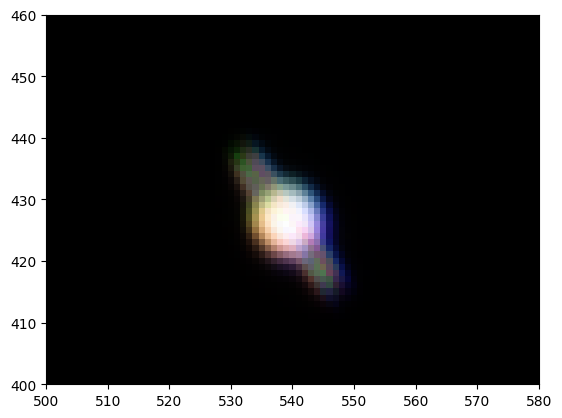

In [120]:
plt.imshow(stacked_t,  cmap='inferno')
plt.xlim(500,580)
plt.ylim(400,460)

In [106]:
# shifting the array data for each image in order to align
visible_flat_array = np.roll(normed.data, (25, 23), axis = (1,0))
blue_flat_array = np.roll(final_blue_flat.data, (-30, -28), axis = (1,0))

In [108]:
# stacking the images
stacked_flats = np.array([final_red_flat.data/final_red_flat.data.max(), visible_flat_array/visible_flat_array.max(), 
                          blue_flat_array/blue_flat_array.max()])
np.shape(stacked3)
stacked_f = np.zeros((1024,1024,3))
stacked_f[:,:,0] = stacked_flats[0]
stacked_f[:,:,1] = stacked_flats[1]
stacked_f[:,:,2] = stacked_flats[2]

(400.0, 460.0)

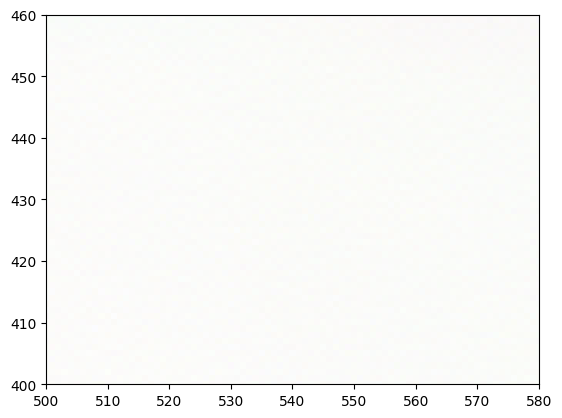

In [110]:
plt.imshow(stacked_f,  cmap='inferno')
plt.xlim(500,580)
plt.ylim(400,460)

In [114]:
sci_image = stacked.data - dark_visible.data
plt.imshow(sci_image.data, cmap='inferno')
sci_image = stacked.data / stacked_f.data
plt.imshow(sci_image.data, cmap='inferno')

ValueError: operands could not be broadcast together with shapes (1024,1024,3) (1024,1024) 